In [1]:
import pandas as pd
import numpy as np

def getGameLogFeatureSet(gameDF):

    def shiftGameLogRecords(gameDF):
        gameDF['LAST_GAME_OE'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['OFFENSIVE_EFFICIENCY'].shift(1)
        gameDF['LAST_GAME_HOME_WIN_PCTG'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['HOME_WIN_PCTG'].shift(1)
        gameDF['LAST_GAME_AWAY_WIN_PCTG'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['AWAY_WIN_PCTG'].shift(1)
        gameDF['LAST_GAME_TOTAL_WIN_PCTG'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['TOTAL_WIN_PCTG'].shift(1)
        gameDF['LAST_GAME_ROLLING_SCORING_MARGIN'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['ROLLING_SCORING_MARGIN'].shift(1)
        gameDF['LAST_GAME_ROLLING_OE'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID','SEASON'])['ROLLING_OE'].shift(1)
    
    
    def getHomeTeamFrame(gameDF):
        homeTeamFrame = gameDF[gameDF['CITY'] != 'OPPONENTS']
        homeTeamFrame = homeTeamFrame[['LAST_GAME_OE','LAST_GAME_HOME_WIN_PCTG','NUM_REST_DAYS','LAST_GAME_AWAY_WIN_PCTG','LAST_GAME_TOTAL_WIN_PCTG','LAST_GAME_ROLLING_SCORING_MARGIN','LAST_GAME_ROLLING_OE','W','TEAM_ID','GAME_ID','SEASON']]

        colRenameDict = {}
        for col in homeTeamFrame.columns:
            if (col != 'GAME_ID') & (col != 'SEASON') :
                colRenameDict[col] = 'HOME_' + col 

        homeTeamFrame.rename(columns=colRenameDict,inplace=True)

        return homeTeamFrame

    def getAwayTeamFrame(gameDF):
        awayTeamFrame = gameDF[gameDF['CITY'] == 'OPPONENTS']
        awayTeamFrame = awayTeamFrame[['LAST_GAME_OE','LAST_GAME_HOME_WIN_PCTG','NUM_REST_DAYS','LAST_GAME_AWAY_WIN_PCTG','LAST_GAME_TOTAL_WIN_PCTG','LAST_GAME_ROLLING_SCORING_MARGIN','LAST_GAME_ROLLING_OE','TEAM_ID','GAME_ID','SEASON']]

        colRenameDict = {}
        for col in awayTeamFrame.columns:
            if (col != 'GAME_ID') & (col != 'SEASON'):
                colRenameDict[col] = 'AWAY_' + col 

        awayTeamFrame.rename(columns=colRenameDict,inplace=True)

        return awayTeamFrame
    
    shiftGameLogRecords(gameDF)
    awayTeamFrame = getAwayTeamFrame(gameDF)
    homeTeamFrame = getHomeTeamFrame(gameDF)
    
    return pd.merge(homeTeamFrame, awayTeamFrame, how="inner", on=[ "GAME_ID","SEASON"]).drop(['GAME_ID','AWAY_TEAM_ID','HOME_TEAM_ID'],axis=1)



In [2]:
import pandas as pd
import numpy as np

def getGameLogFeatureSet(gameDF):
    """
    Combina los datos de los partidos con las estadísticas de apuestas.

    Args:
        gameDF (pd.DataFrame): DataFrame con los datos de los partidos, incluyendo las columnas de apuestas.

    Returns:
        pd.DataFrame: DataFrame combinado con las estadísticas de los partidos y las apuestas.
    """

    def shiftGameLogRecords(gameDF):
        gameDF['LAST_GAME_OE'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID', 'SEASON'])['OFFENSIVE_EFFICIENCY'].shift(1)
        gameDF['LAST_GAME_HOME_WIN_PCTG'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID', 'SEASON'])['HOME_WIN_PCTG'].shift(1)
        gameDF['LAST_GAME_AWAY_WIN_PCTG'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID', 'SEASON'])['AWAY_WIN_PCTG'].shift(1)
        gameDF['LAST_GAME_TOTAL_WIN_PCTG'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID', 'SEASON'])['TOTAL_WIN_PCTG'].shift(1)
        gameDF['LAST_GAME_ROLLING_SCORING_MARGIN'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID', 'SEASON'])['ROLLING_SCORING_MARGIN'].shift(1)
        gameDF['LAST_GAME_ROLLING_OE'] = gameDF.sort_values('GAME_DATE').groupby(['TEAM_ID', 'SEASON'])['ROLLING_OE'].shift(1)

    def getHomeTeamFrame(gameDF):
        homeTeamFrame = gameDF[gameDF['CITY'] != 'OPPONENTS']
        homeTeamFrame = homeTeamFrame[['LAST_GAME_OE', 'LAST_GAME_HOME_WIN_PCTG', 'NUM_REST_DAYS', 'LAST_GAME_AWAY_WIN_PCTG',
                                       'LAST_GAME_TOTAL_WIN_PCTG', 'LAST_GAME_ROLLING_SCORING_MARGIN', 'LAST_GAME_ROLLING_OE',
                                       'W', 'TEAM_ID', 'GAME_ID', 'SEASON', 'Average_H']]

        colRenameDict = {}
        for col in homeTeamFrame.columns:
            if (col != 'GAME_ID') & (col != 'SEASON'):
                colRenameDict[col] = 'HOME_' + col

        homeTeamFrame.rename(columns=colRenameDict, inplace=True)

        return homeTeamFrame

    def getAwayTeamFrame(gameDF):
        awayTeamFrame = gameDF[gameDF['CITY'] == 'OPPONENTS']
        awayTeamFrame = awayTeamFrame[['LAST_GAME_OE', 'LAST_GAME_HOME_WIN_PCTG', 'NUM_REST_DAYS', 'LAST_GAME_AWAY_WIN_PCTG',
                                       'LAST_GAME_TOTAL_WIN_PCTG', 'LAST_GAME_ROLLING_SCORING_MARGIN', 'LAST_GAME_ROLLING_OE',
                                       'TEAM_ID', 'GAME_ID', 'SEASON', 'Average_A']]

        colRenameDict = {}
        for col in awayTeamFrame.columns:
            if (col != 'GAME_ID') & (col != 'SEASON'):
                colRenameDict[col] = 'AWAY_' + col

        awayTeamFrame.rename(columns=colRenameDict, inplace=True)

        return awayTeamFrame

    # Aplicar el desplazamiento de registros
    shiftGameLogRecords(gameDF)

    # Obtener los DataFrames de equipos locales y visitantes
    awayTeamFrame = getAwayTeamFrame(gameDF)
    homeTeamFrame = getHomeTeamFrame(gameDF)

    # Combinar los datos de equipos locales y visitantes
    combinedDF = pd.merge(homeTeamFrame, awayTeamFrame, how="inner", on=["GAME_ID", "SEASON"])

    # Eliminar columnas innecesarias
    combinedDF = combinedDF.drop(['GAME_ID', 'AWAY_TEAM_ID', 'HOME_TEAM_ID'], axis=1, errors='ignore')

    return combinedDF

In [3]:
import sqlite3
import pandas as pd

# Conectar a la base de datos SQLite
conexion = sqlite3.connect("NBA_DATA.db")

# Leer todos los registros de la tabla GAMES
query = """
SELECT 
    gs.*,
    g.GAME_DATE,
    g.SEASON,
    ods.Average_H,
    ods.Average_A
FROM GAME_STATS gs
LEFT JOIN GAMES g ON gs.GAME_ID = g.GAME_ID
LEFT JOIN GAME_ODS ods ON gs.GAME_ID = ods.GAME_ID
"""
games_df = pd.read_sql_query(query, conexion)

# Cerrar la conexión
conexion.close()

# Mostrar los primeros registros del DataFrame
modelData = getGameLogFeatureSet(games_df)
modelData

,HOME_LAST_GAME_OE,HOME_LAST_GAME_HOME_WIN_PCTG,HOME_NUM_REST_DAYS,HOME_LAST_GAME_AWAY_WIN_PCTG,HOME_LAST_GAME_TOTAL_WIN_PCTG,HOME_LAST_GAME_ROLLING_SCORING_MARGIN,HOME_LAST_GAME_ROLLING_OE,HOME_W,SEASON,HOME_Average_H,AWAY_LAST_GAME_OE,AWAY_LAST_GAME_HOME_WIN_PCTG,AWAY_NUM_REST_DAYS,AWAY_LAST_GAME_AWAY_WIN_PCTG,AWAY_LAST_GAME_TOTAL_WIN_PCTG,AWAY_LAST_GAME_ROLLING_SCORING_MARGIN,AWAY_LAST_GAME_ROLLING_OE,AWAY_Average_A
0,0.561983,0.483871,2.0,0.454545,0.468750,0.666667,0.602820,1,2024-25,NaN,0.551181,0.363636,1.0,0.333333,0.349206,-9.333333,0.567970,NaN
1,0.661290,0.466667,2.0,0.454545,0.460317,0.666667,0.648050,1,2024-25,NaN,0.596639,0.655172,2.0,0.500000,0.573770,7.333333,0.615546,NaN
2,0.585185,0.448276,2.0,0.454545,0.451613,-6.666667,0.615792,1,2024-25,NaN,0.609375,0.655172,2.0,0.516129,0.583333,7.666667,0.637097,NaN
3,0.697674,0.464286,1.0,0.454545,0.459016,-12.000000,0.618470,0,2024-25,NaN,0.647059,0.700000,3.0,0.448276,0.576271,7.000000,0.556985,NaN
4,0.637795,0.733333,2.0,0.533333,0.633333,0.000000,0.616567,0,2024-25,NaN,0.564516,0.464286,3.0,0.437500,0.450000,-8.666667,0.574437,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10147,0.556522,0.666667,NaN,0.375000,0.529412,-2.333333,0.552390,1,2024-25,NaN,0.609929,0.500000,NaN,0.428571,0.466667,-1.333333,0.611158,NaN
10148,0.522124,0.000000,2.0,0.000000,0.000000,-25.333333,0.474396,0,2024-25,NaN,0.577982,1.000000,2.0,1.000000,1.000000,25.333333,0.588551,NaN
10149,0.491228,NaN,2.0,0.000000,0.000000,-35.000000,0.450532,0,2024-25,NaN,0.568966,1.000000,2.0,NaN,1.000000,35.000000,0.593835,NaN
10150,0.618705,1.000000,2.0,NaN,1.000000,51.000000,0.618705,1,2024-25,NaN,0.409836,NaN,2.0,0.000000,0.000000,-51.000000,0.409836,NaN


In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing 
from sklearn.metrics import classification_report

Análisis de valores nulos:
                                       Cantidad Nulos  Porcentaje Nulos
HOME_Average_H                                   2770         27.285264
AWAY_Average_A                                   2770         27.285264
AWAY_LAST_GAME_AWAY_WIN_PCTG                      321          3.161939
HOME_LAST_GAME_HOME_WIN_PCTG                      320          3.152088
HOME_LAST_GAME_AWAY_WIN_PCTG                      269          2.649724
AWAY_LAST_GAME_HOME_WIN_PCTG                      256          2.521671
AWAY_NUM_REST_DAYS                                205          2.019307
HOME_NUM_REST_DAYS                                203          1.999606
AWAY_LAST_GAME_OE                                 121          1.191883
AWAY_LAST_GAME_TOTAL_WIN_PCTG                     121          1.191883
AWAY_LAST_GAME_ROLLING_SCORING_MARGIN             121          1.191883
AWAY_LAST_GAME_ROLLING_OE                         121          1.191883
HOME_LAST_GAME_TOTAL_WIN_PCTG        

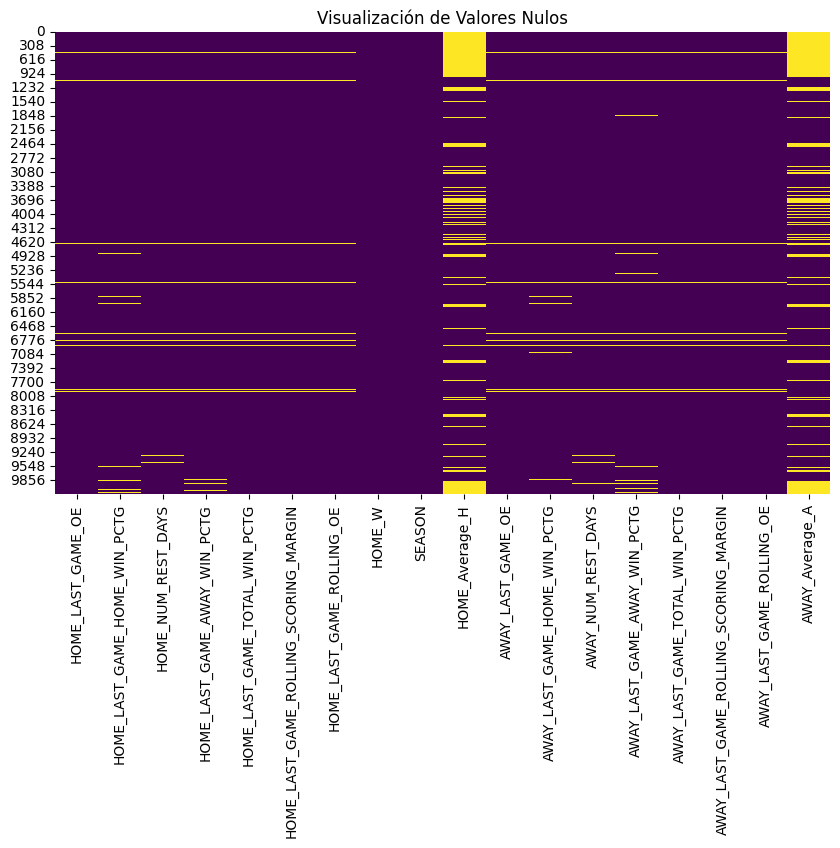

C:\Users\andre\AppData\Local\Temp\ipykernel_18392\1588104784.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nulos_por_columna.index, y=nulos_por_columna.values, palette='viridis')


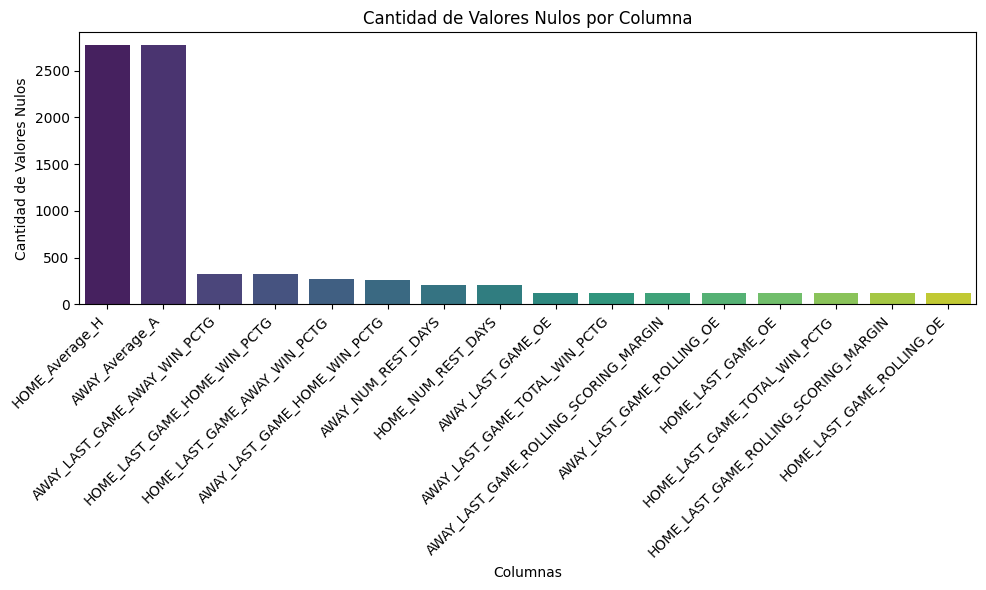

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analizar_nulos(df):
    """
    Analiza los valores nulos en un DataFrame de pandas.

    Args:
        df (pd.DataFrame): El DataFrame a analizar.

    Returns:
        pd.DataFrame: Un DataFrame con información sobre los valores nulos
                      por columna (cantidad, porcentaje).
    """
    total_nulos = df.isnull().sum()
    porcentaje_nulos = (total_nulos / len(df)) * 100
    info_nulos = pd.DataFrame({
        'Cantidad Nulos': total_nulos,
        'Porcentaje Nulos': porcentaje_nulos
    })
    return info_nulos.sort_values(by='Cantidad Nulos', ascending=False)

def mostrar_filas_con_nulos(df, columna=None, num_filas=5):
    """
    Muestra algunas filas que contienen valores nulos.

    Args:
        df (pd.DataFrame): El DataFrame a analizar.
        columna (str, opcional): Si se especifica, muestra solo las filas con
                                 nulos en esa columna. Por defecto, muestra
                                 filas con nulos en cualquier columna.
        num_filas (int, opcional): El número máximo de filas a mostrar. Por
                                   defecto, muestra 5 filas.
    """
    if columna:
        filas_con_nulos = df[df[columna].isnull()]
        if not filas_con_nulos.empty:
            print(f"\nFilas con valores nulos en la columna '{columna}':")
            print(filas_con_nulos.head(num_filas))
        else:
            print(f"\nNo se encontraron valores nulos en la columna '{columna}'.")
    else:
        filas_con_nulos = df[df.isnull().any(axis=1)]
        if not filas_con_nulos.empty:
            print("\nAlgunas filas que contienen valores nulos:")
            print(filas_con_nulos.head(num_filas))
        else:
            print("\nNo se encontraron valores nulos en el DataFrame.")

def visualizar_nulos_matriz(df):
    """
    Visualiza la presencia de valores nulos como una matriz.

    Args:
        df (pd.DataFrame): El DataFrame a visualizar.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Visualización de Valores Nulos')
    plt.show()

def visualizar_nulos_barras(df):
    """
    Visualiza la cantidad de valores nulos por columna mediante un gráfico de barras.

    Args:
        df (pd.DataFrame): El DataFrame a visualizar.
    """
    

    nulos_por_columna = df.isnull().sum()
    nulos_por_columna = nulos_por_columna[nulos_por_columna > 0].sort_values(ascending=False)

    if not nulos_por_columna.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=nulos_por_columna.index, y=nulos_por_columna.values, palette='viridis')
        plt.xlabel('Columnas')
        plt.ylabel('Cantidad de Valores Nulos')
        plt.title('Cantidad de Valores Nulos por Columna')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("\nNo se encontraron valores nulos para visualizar.")

# Ejemplo de uso:

# Crear un DataFrame de ejemplo con valores nulos
data = {'Columna A': [1, 2, None, 4, 5],
        'Columna B': [None, 'a', 'b', None, 'c'],
        'Columna C': [True, False, True, True, None],
        'Columna D': [3.14, 2.71, None, 1.61, 0.57]}
df_ejemplo = modelData

print("Análisis de valores nulos:")
info_nulos = analizar_nulos(df_ejemplo)
print(info_nulos)

mostrar_filas_con_nulos(df_ejemplo)
#mostrar_filas_con_nulos(df_ejemplo, columna='Columna B')

visualizar_nulos_matriz(df_ejemplo)
visualizar_nulos_barras(df_ejemplo)

In [6]:
data = modelData
data = data.dropna()
data

,HOME_LAST_GAME_OE,HOME_LAST_GAME_HOME_WIN_PCTG,HOME_NUM_REST_DAYS,HOME_LAST_GAME_AWAY_WIN_PCTG,HOME_LAST_GAME_TOTAL_WIN_PCTG,HOME_LAST_GAME_ROLLING_SCORING_MARGIN,HOME_LAST_GAME_ROLLING_OE,HOME_W,SEASON,HOME_Average_H,AWAY_LAST_GAME_OE,AWAY_LAST_GAME_HOME_WIN_PCTG,AWAY_NUM_REST_DAYS,AWAY_LAST_GAME_AWAY_WIN_PCTG,AWAY_LAST_GAME_TOTAL_WIN_PCTG,AWAY_LAST_GAME_ROLLING_SCORING_MARGIN,AWAY_LAST_GAME_ROLLING_OE,AWAY_Average_A
986,0.624060,0.625000,2.0,0.512195,0.567901,3.333333,0.633417,1,2023-24,1.10,0.529412,0.512195,2.0,0.375000,0.444444,-3.333333,0.553405,7.50
987,0.603774,0.743590,2.0,0.634146,0.687500,3.333333,0.611607,1,2023-24,1.14,0.609375,0.512195,2.0,0.384615,0.450000,-13.000000,0.559995,6.01
988,0.521429,0.525000,1.0,0.384615,0.455696,-17.333333,0.514916,0,2023-24,1.24,0.538462,0.268293,1.0,0.210526,0.240506,-6.666667,0.585157,4.17
989,0.549180,0.538462,3.0,0.384615,0.461538,-12.666667,0.549439,0,2023-24,2.35,0.576923,0.526316,2.0,0.575000,0.551282,3.000000,0.571057,1.62
990,0.533898,0.794872,2.0,0.578947,0.688312,10.666667,0.592600,1,2023-24,1.16,0.474138,0.538462,2.0,0.394737,0.467532,2.000000,0.564119,5.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9852,0.605263,0.750000,2.0,0.666667,0.714286,0.333333,0.589421,1,2023-24,1.54,0.644628,1.000000,2.0,0.250000,0.571429,-1.666667,0.617267,2.55
9853,0.645455,0.666667,4.0,0.666667,0.666667,0.666667,0.570673,1,2023-24,1.44,0.647541,1.000000,4.0,0.333333,0.666667,4.000000,0.613058,2.91
9854,0.564516,0.500000,2.0,0.333333,0.400000,4.000000,0.565670,0,2023-24,1.67,0.517544,0.666667,2.0,0.500000,0.600000,-4.000000,0.561318,2.27
9855,0.549020,1.000000,2.0,0.500000,0.750000,-1.000000,0.569232,0,2023-24,1.59,0.495238,0.500000,2.0,0.000000,0.250000,1.000000,0.563684,2.44


In [6]:
validation = data[data['SEASON'] == '2023-24']
modelData = data[data['SEASON'] != '2023-24']

In [7]:
X = modelData.drop(['HOME_W','SEASON'],axis=1)
y = modelData['HOME_W']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33,shuffle=False)

# Standard Scaling Prediction Variables
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
scaled_data_train = scaler.transform(X_train)

scaler.fit(X_test)
scaled_data_test = scaler.transform(X_test)

In [8]:
#Logistic Regression

model = LogisticRegression()
model.fit(scaled_data_train,y_train)
model.score(scaled_data_test,y_test)

0.6661554192229039

In [ ]:
F1Score = cross_val_score(model,scaled_data_test,y_test,cv=12,scoring='f1_macro')
print("Logistic Model F1 Accuracy: %0.2f (+/- %0.2f)"%(F1Score.mean(), F1Score.std() *2))

Logistic Model F1 Accuracy: 0.64 (+/- 0.08)


In [10]:
# Test Set Review

y_pred = model.predict(scaled_data_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.48      0.56       856
           1       0.67      0.81      0.73      1100

    accuracy                           0.67      1956
   macro avg       0.67      0.65      0.65      1956
weighted avg       0.67      0.67      0.66      1956



In [11]:
#Validation Set review

# Standard Scaling Prediction Variables
scaler = preprocessing.StandardScaler()
scaler.fit(validation.drop(['HOME_W','SEASON'],axis=1))
scaled_val_data = scaler.transform(validation.drop(['HOME_W','SEASON'],axis=1))

In [12]:
y_pred = model.predict(scaled_val_data)
print(classification_report(validation['HOME_W'],y_pred))

              precision    recall  f1-score   support

           0       0.74      0.49      0.59       493
           1       0.67      0.85      0.75       592

    accuracy                           0.69      1085
   macro avg       0.70      0.67      0.67      1085
weighted avg       0.70      0.69      0.68      1085



In [13]:
def validator(predictions:pd.DataFrame, actual:pd.DataFrame, cuotas:pd.DataFrame):
    # predictions: DataFrame con las predicciones del modelo [GAME_ID, Prediction, Date]
    # actual: DataFrame con los resultados reales [GAME_ID, Result, Date]
    # cuotas: DataFrame con las cuotas [GAME_ID, Cuota_H, Cuota_A, Date]

    # Combinar los DataFrames en uno solo
    combined = predictions.merge(actual, on=["GAME_ID", "Date"]).merge(cuotas, on=["GAME_ID", "Date"])
    
    # Inicializar lista para almacenar resultados diarios
    daily_results = []

    # Iterar por cada día único en el DataFrame combinado
    for date, group in combined.groupby("Date"):
        # Inicializar métricas diarias
        total_money = 0
        total_bets = 0
        total_wins = 0
        total_odds = 0

        # Iterar por cada fila del grupo (día)
        for _, row in group.iterrows():
            total_bets += 1
            if row["Prediction"] == row["Result"]:  # Apuesta ganada
                total_wins += 1
                if row["Prediction"] == 1:  # Apostó por el equipo local
                    total_money += row["Cuota_H"]
                    total_odds += row["Cuota_H"]
                else:  # Apostó por el equipo visitante
                    total_money += row["Cuota_A"]
                    total_odds += row["Cuota_A"]
            else:  # Apuesta perdida
                total_money -= 1  # Supongamos que cada apuesta es de 1 unidad

        # Calcular cuota media
        avg_odds = total_odds / total_bets if total_bets > 0 else 0

        # Guardar resultados del día
        daily_results.append({
            "Date": date,
            "Total_Money": total_money,
            "Total_Bets": total_bets,
            "Total_Wins": total_wins,
            "Average_Odds": avg_odds
        })

    # Convertir resultados diarios a DataFrame
    results_df = pd.DataFrame(daily_results)

    return results_df

In [14]:
modelData.columns

Index(['HOME_LAST_GAME_OE', 'HOME_LAST_GAME_HOME_WIN_PCTG',
       'HOME_NUM_REST_DAYS', 'HOME_LAST_GAME_AWAY_WIN_PCTG',
       'HOME_LAST_GAME_TOTAL_WIN_PCTG',
       'HOME_LAST_GAME_ROLLING_SCORING_MARGIN', 'HOME_LAST_GAME_ROLLING_OE',
       'HOME_W', 'SEASON', 'HOME_Average_H', 'AWAY_LAST_GAME_OE',
       'AWAY_LAST_GAME_HOME_WIN_PCTG', 'AWAY_NUM_REST_DAYS',
       'AWAY_LAST_GAME_AWAY_WIN_PCTG', 'AWAY_LAST_GAME_TOTAL_WIN_PCTG',
       'AWAY_LAST_GAME_ROLLING_SCORING_MARGIN', 'AWAY_LAST_GAME_ROLLING_OE',
       'AWAY_Average_A'],
      dtype='object')

In [15]:
modelData_t = modelData[['HOME_W', 'HOME_Average_H']].dropna()
modelData_t.loc[modelData_t['HOME_W'] == 0, 'HOME_Average_H'] = -1
modelData_t

,HOME_W,HOME_Average_H
2216,1,1.51
2217,0,-1.00
2218,1,1.12
2219,0,-1.00
2220,1,1.67
...,...,...
9767,1,1.21
9768,0,-1.00
9769,0,-1.00
9770,1,3.69


In [ ]:
modelData_t['HOME_Average_H'].sum()


3178.48

In [23]:
validation

,HOME_LAST_GAME_OE,HOME_LAST_GAME_HOME_WIN_PCTG,HOME_NUM_REST_DAYS,HOME_LAST_GAME_AWAY_WIN_PCTG,HOME_LAST_GAME_TOTAL_WIN_PCTG,HOME_LAST_GAME_ROLLING_SCORING_MARGIN,HOME_LAST_GAME_ROLLING_OE,HOME_W,SEASON,HOME_Average_H,AWAY_LAST_GAME_OE,AWAY_LAST_GAME_HOME_WIN_PCTG,AWAY_NUM_REST_DAYS,AWAY_LAST_GAME_AWAY_WIN_PCTG,AWAY_LAST_GAME_TOTAL_WIN_PCTG,AWAY_LAST_GAME_ROLLING_SCORING_MARGIN,AWAY_LAST_GAME_ROLLING_OE,AWAY_Average_A
986,0.624060,0.625000,2.0,0.512195,0.567901,3.333333,0.633417,1,2023-24,1.10,0.529412,0.512195,2.0,0.375000,0.444444,-3.333333,0.553405,7.50
987,0.603774,0.743590,2.0,0.634146,0.687500,3.333333,0.611607,1,2023-24,1.14,0.609375,0.512195,2.0,0.384615,0.450000,-13.000000,0.559995,6.01
988,0.521429,0.525000,1.0,0.384615,0.455696,-17.333333,0.514916,0,2023-24,1.24,0.538462,0.268293,1.0,0.210526,0.240506,-6.666667,0.585157,4.17
989,0.549180,0.538462,3.0,0.384615,0.461538,-12.666667,0.549439,0,2023-24,2.35,0.576923,0.526316,2.0,0.575000,0.551282,3.000000,0.571057,1.62
990,0.533898,0.794872,2.0,0.578947,0.688312,10.666667,0.592600,1,2023-24,1.16,0.474138,0.538462,2.0,0.394737,0.467532,2.000000,0.564119,5.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9852,0.605263,0.750000,2.0,0.666667,0.714286,0.333333,0.589421,1,2023-24,1.54,0.644628,1.000000,2.0,0.250000,0.571429,-1.666667,0.617267,2.55
9853,0.645455,0.666667,4.0,0.666667,0.666667,0.666667,0.570673,1,2023-24,1.44,0.647541,1.000000,4.0,0.333333,0.666667,4.000000,0.613058,2.91
9854,0.564516,0.500000,2.0,0.333333,0.400000,4.000000,0.565670,0,2023-24,1.67,0.517544,0.666667,2.0,0.500000,0.600000,-4.000000,0.561318,2.27
9855,0.549020,1.000000,2.0,0.500000,0.750000,-1.000000,0.569232,0,2023-24,1.59,0.495238,0.500000,2.0,0.000000,0.250000,1.000000,0.563684,2.44


In [20]:
np.unique(y_pred, return_counts=True)

(array([0, 1], dtype=int64), array([327, 758], dtype=int64))